In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from prophet import Prophet
from forecastTable import forecastTable
from columnCleaner import columnCleaner

Importing plotly failed. Interactive plots will not work.


In [3]:
train_obs = pd.read_csv("data/observations_train.csv")
test_obs = pd.read_csv("data/observations_test.csv")
series = pd.read_csv("data/series.csv")

normalize = lambda col: (col-col.mean())/col.std()
normed_obs = train_obs.pivot_table(values="value", index="date", columns="series_id")
normed_obs = normed_obs.apply(normalize, axis=0)
test_obs['date'].unique()[-1]

'2021-02-12 00:00:00.0000000'

In [4]:
cols = list(set(series['series_id'].unique()) - set(['SP500']))
# cols = ['GVIPT54000S']
# cols = ["PCUADLVWRADLVWR",
# "PCUAINFOAINFO",
# "PCUAMUMAMUM",
# "PCUARETTRARETTR",
# "PCUASHCASHC",
# "PCUASTDSVASTDSV",
# "PCUATRADEATRADE",
# "PCUATRANSATRANS",
# "PCUATRNWRATRNWR",
# "PCUATTDSVATTDSV",
# "PCUAWHLTRAWHLTR",
# "PCUOMFGOMFG",
# "PCUOMINOMIN"]
features = columnCleaner("data/observations_train.csv", columns=cols)

Dropping Column: SOFR
Dropping Column: DEXJPUS
Dropping Column: SOFRVOL


Not included: DEXJPUS, SOFR, and SOFRVOL

In [5]:
m = Prophet()
dropped_cols = ["DEXJPUS", "SOFR", "SOFRVOL"]
for c in cols:
    if c not in dropped_cols:
        m.add_regressor(c, standardize=False)

In [6]:
m.fit(features)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
horizon = 900
cols = list(set(cols) - set(dropped_cols))
forecast = forecastTable(m,
                         horizon, 
                         "data/observations_train.csv", 
                         "data/observations_test.csv",
                        columns=cols)

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,AAA10Y,AAA10Y_lower,AAA10Y_upper,ASEANTOT,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-02-14,-1.213354,-1.130170,-0.989342,-1.213354,-1.213354,-0.005759,-0.005759,-0.005759,0.089447,...,0.013756,0.013756,0.013756,0.025193,0.025193,0.025193,0.0,0.0,0.0,-1.057965
1,2011-02-15,-1.212176,-1.130027,-0.983707,-1.212176,-1.212176,-0.023810,-0.023810,-0.023810,0.089447,...,0.013707,0.013707,0.013707,0.029605,0.029605,0.029605,0.0,0.0,0.0,-1.060403
2,2011-02-16,-1.210997,-1.155496,-1.004881,-1.210997,-1.210997,-0.023810,-0.023810,-0.023810,0.089447,...,0.010770,0.010770,0.010770,0.033638,0.033638,0.033638,0.0,0.0,0.0,-1.078986
3,2011-02-17,-1.209819,-1.140077,-0.990953,-1.209819,-1.209819,-0.032835,-0.032835,-0.032835,0.089447,...,0.008856,0.008856,0.008856,0.037273,0.037273,0.037273,0.0,0.0,0.0,-1.064890
4,2011-02-18,-1.208641,-1.103087,-0.953726,-1.208641,-1.208641,-0.038852,-0.038852,-0.038852,0.089447,...,0.008878,0.008878,0.008878,0.040500,0.040500,0.040500,0.0,0.0,0.0,-1.029859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,2020-06-14,5.105645,2.923024,3.379913,4.897979,5.322555,-0.068936,-0.068936,-0.068936,-0.039544,...,-0.027984,-0.027984,-0.027984,0.063191,0.063191,0.063191,0.0,0.0,0.0,3.145176
3409,2020-06-15,5.107568,2.967967,3.413032,4.899617,5.324813,-0.068936,-0.068936,-0.068936,-0.039544,...,0.013756,0.013756,0.013756,0.060327,0.060327,0.060327,0.0,0.0,0.0,3.185975
3410,2020-06-16,5.109491,3.066303,3.511675,4.901081,5.327070,-0.014784,-0.014784,-0.014784,-0.039544,...,0.013707,0.013707,0.013707,0.057553,0.057553,0.057553,0.0,0.0,0.0,3.276930
3411,2020-06-17,5.111413,3.037818,3.479141,4.902545,5.329327,-0.035843,-0.035843,-0.035843,-0.039544,...,0.010770,0.010770,0.010770,0.054924,0.054924,0.054924,0.0,0.0,0.0,3.253834


In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ds'>

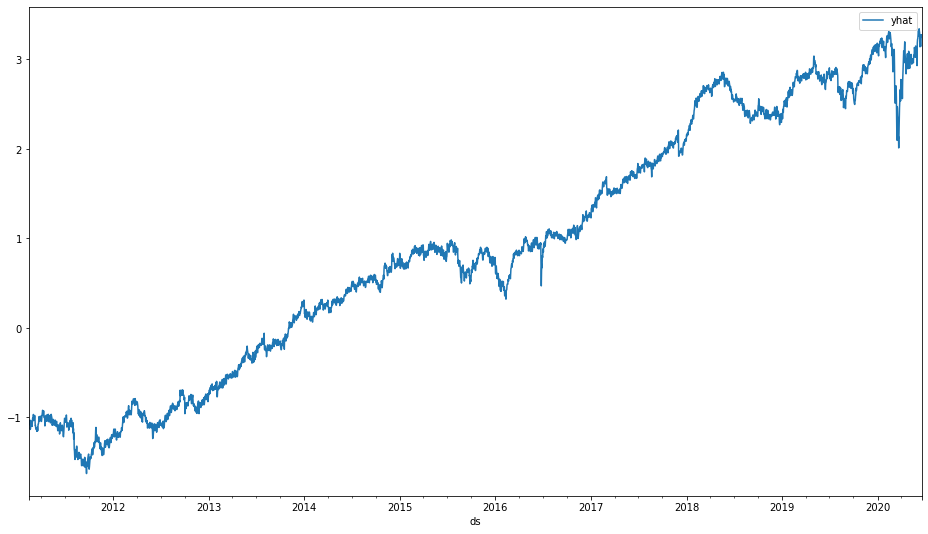

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))
forecast[['ds', 'yhat']].plot("ds", ax=ax)
# ax.set_xlim(['2020-01-01', '2020-06-18'])

In [11]:
from prophet.utilities import regressor_coefficients

factors = regressor_coefficients(m)
factors['abs_coef'] = abs(factors['coef'])
factors.sort_values("abs_coef", ascending=True, inplace=True)
factors

,regressor,regressor_mode,center,coef_lower,coef,coef_upper,abs_coef
22,OBFRVOL,additive,0.0,0.002012,0.002012,0.002012,0.002012
52,EFFRVOL,additive,0.0,0.005947,0.005947,0.005947,0.005947
27,INFECTDISEMVTRACKD,additive,0.0,-0.007194,-0.007194,-0.007194,0.007194
37,CBUSAPPWNSAUS,additive,0.0,0.015138,0.015138,0.015138,0.015138
66,UNRATE,additive,0.0,0.016276,0.016276,0.016276,0.016276
...,...,...,...,...,...,...,...
42,PCUASTDSVASTDSV,additive,0.0,1.336476,1.336476,1.336476,1.336476
1,GVIPT54000S,additive,0.0,-1.783974,-1.783974,-1.783974,1.783974
10,PCUATTDSVATTDSV,additive,0.0,-2.152529,-2.152529,-2.152529,2.152529
32,PCUATRANSATRANS,additive,0.0,-2.225161,-2.225161,-2.225161,2.225161


<AxesSubplot:ylabel='regressor'>

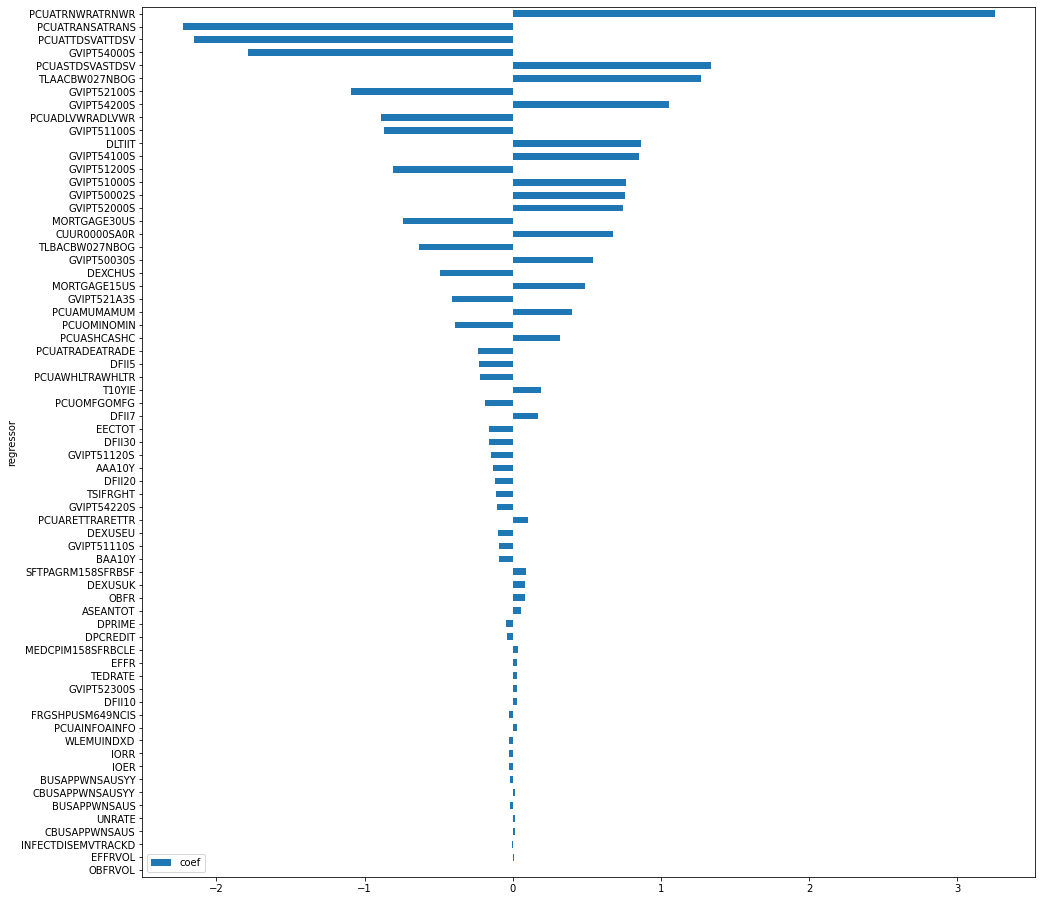

In [12]:
fig, ax = plt.subplots(figsize=(16, 16))
pcucols = ["PCUADLVWRADLVWR",
"PCUAINFOAINFO",
"PCUAMUMAMUM",
"PCUARETTRARETTR",
"PCUASHCASHC",
"PCUASTDSVASTDSV",
"PCUATRADEATRADE",
"PCUATRANSATRANS",
"PCUATRNWRATRNWR",
"PCUATTDSVATTDSV",
"PCUAWHLTRAWHLTR",
"PCUOMFGOMFG",
"PCUOMINOMIN"]
factors.plot.barh('regressor', 'coef', ax=ax)

In [13]:
t = pd.concat([normed_obs.corr()['SP500'], normalize(factors.set_index("regressor")['coef'])], axis=1)

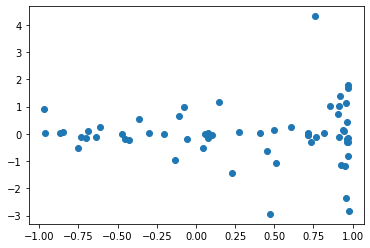

In [14]:
plt.scatter(t.SP500, t.coef)

In [15]:
wild_cards = ['UNRATE', 'INFECTDISEMVTRACKD']
top_cols = factors.sort_values("abs_coef", ascending=False)['regressor'].values
top_cols

array(['PCUATRNWRATRNWR', 'PCUATRANSATRANS', 'PCUATTDSVATTDSV',
       'GVIPT54000S', 'PCUASTDSVASTDSV', 'TLAACBW027NBOG', 'GVIPT52100S',
       'GVIPT54200S', 'PCUADLVWRADLVWR', 'GVIPT51100S', 'DLTIIT',
       'GVIPT54100S', 'GVIPT51200S', 'GVIPT51000S', 'GVIPT50002S',
       'GVIPT52000S', 'MORTGAGE30US', 'CUUR0000SA0R', 'TLBACBW027NBOG',
       'GVIPT50030S', 'DEXCHUS', 'MORTGAGE15US', 'GVIPT521A3S',
       'PCUAMUMAMUM', 'PCUOMINOMIN', 'PCUASHCASHC', 'PCUATRADEATRADE',
       'DFII5', 'PCUAWHLTRAWHLTR', 'T10YIE', 'PCUOMFGOMFG', 'DFII7',
       'EECTOT', 'DFII30', 'GVIPT51120S', 'AAA10Y', 'DFII20', 'TSIFRGHT',
       'GVIPT54220S', 'PCUARETTRARETTR', 'DEXUSEU', 'GVIPT51110S',
       'BAA10Y', 'SFTPAGRM158SFRBSF', 'DEXUSUK', 'OBFR', 'ASEANTOT',
       'DPRIME', 'DPCREDIT', 'MEDCPIM158SFRBCLE', 'EFFR', 'TEDRATE',
       'GVIPT52300S', 'DFII10', 'FRGSHPUSM649NCIS', 'PCUAINFOAINFO',
       'WLEMUINDXD', 'IORR', 'IOER', 'BUSAPPWNSAUSYY', 'CBUSAPPWNSAUSYY',
       'BUSAPPWNSAUS', 'UNRATE'

In [32]:
from prophet.diagnostics import performance_metrics, cross_validation
from concurrent.futures import ProcessPoolExecutor

def eval_model(f):
    """train and evaluate model crossvalidation on f factors."""
    m = Prophet()
    feat = columnCleaner("data/observations_train.csv", columns=f)
    dropped_cols = ["DEXJPUS", "SOFR", "SOFRVOL"]
    for c in f:
        if c not in dropped_cols:
            m.add_regressor(c, standardize=False)
    m.fit(feat)
    df_cv = cross_validation(m, initial='365 days', period="180 days", horizon='1 day')

    perf = performance_metrics(df_cv)
    
    return perf['mape'].mean()

def run_models(i):
    """run the models."""
    # model1 - no wildcards
    fctrs = top_cols[:i]
#     print(fctrs)
    one = eval_model(fctrs)

    # model2 - UNRATE
    fctrs2 = np.append(fctrs, 'UNRATE')
#     print(fctrs2)
    two = eval_model(fctrs2)

    # model3 - INFECTDISEMVTRACKD
    fctrs3 = np.append(fctrs, 'INFECTDISEMVTRACKD')
#     print(fctrs3)
    three = eval_model(fctrs3)

    # model4 - both
    fctrs4 = np.append(fctrs3, 'UNRATE')
#     print(fctrs4)
    four = eval_model(fctrs4)

    return (one, two, three, four)

# with ProcessPoolExecutor() as executor:
#     l = list(executor.map(run_models, range(1, 11)))
run_models(5)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 12 forecasts with cutoffs between 2012-07-05 00:00:00 and 2017-12-28 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

(0.21673130734384116,
 0.36833878080755267,
 0.22518321957979504,
 0.39405812771646637)

In [ ]:
%time eval_model(top_cols[:21])

In [20]:
oneseventwozero = [(2.5380135361595095,
  3.4752944824347294,
  2.595920158363373,
  3.689808284365746),
 (2.5208146411166226, 3.741774828971389, 2.599282416240165, 3.571801069761113),
 (2.5632666101838217,
  3.629799022972571,
  2.6094263354521012,
  3.6193939626579774),
 (1.8564845410618511,
  2.6339568101526694,
  1.863429723686856,
  2.6667454134128956)]

In [25]:
firstten = [(3.31440167665234, 2.2019827662180855, 3.242194235334837, 2.1508165939278125),
 (3.2452444043137394,
  2.194939328679657,
  3.3123241408814135,
  2.2030626808566076),
 (3.094207117775177, 2.2192052954753296, 3.11053678319414, 2.140583631296782),
 (3.257997030812041,
  2.3917799799751442,
  3.2103402963776486,
  2.364992405569559),
 (2.4446692266326395,
  2.3078974596977107,
  2.484030211953862,
  2.370165771402371),
 (2.493468953857067,
  3.0466374812620867,
  2.511112790480943,
  3.1652605830413774),
 (2.4748201272947625,
  2.9516129580079737,
  2.491768520977864,
  2.9761009301328296),
 (2.0579406637072735,
  3.0458878177532815,
  1.8946516519733254,
  3.037771775587174),
 (2.0671830376767137,
  3.0294932596011006,
  2.1623448586130216,
  3.021137959581392),
 (2.2715921514641564,
  3.3882643641717825,
  2.2708659373803104,
  3.4582717788654382)]

In [26]:
middle = [(2.6741761903631236,
  3.6644906740139462,
  2.675022082839199,
  3.6429404403428687),
 (2.7745774602735493,
  3.9004234700232114,
  2.7806888881103125,
  3.901621858183375),
 (2.216167031886056, 3.2947802671123, 2.1479983847421718, 3.2968066622496055),
 (2.0825869949053453,
  3.1780778789374238,
  2.087507568337204,
  3.2040968228505635),
 (2.098498505246806, 3.230830313166221, 2.066464497287097, 3.0838851343611906),
 (2.55526463125446, 3.0493994847462664, 2.593707383999514, 3.434802113363648)]

<AxesSubplot:>

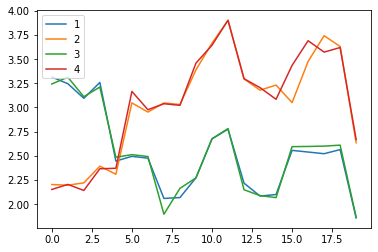

In [33]:
performance = firstten + middle + oneseventwozero
performance = pd.DataFrame(performance, columns=list(range(1, 5)))
performance.plot()

In [34]:
performance.to_csv("model_perf.csv")